In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [10]:
data = np.load('./mnist_train_small.npy') # we have take mnist data set.

We have dimensions of approx 20K rows and 785 columns. Out of 785 columns, 1 column is our y i.e Output and remaining 784 i.e. image of 28*28 pixels is our examples or input.  

In [11]:
data

array([[5, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [12]:
data.shape

(19999, 785)

In [76]:
X = data[:,1:] # All the rows and column from 1 to 785. 
y = data[:,0] # All the rows and column with index 0.

In [14]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [77]:
y

array([5, 7, 9, ..., 2, 9, 5], dtype=uint8)

In [78]:
X.shape, y.shape # for each x examples we will have y answers.

((19999, 784), (19999,))

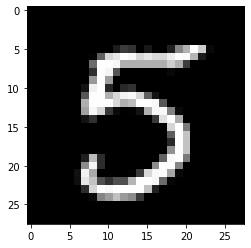

In [17]:
plt.imshow(X[0].reshape(28,28), cmap ='gray')

In [79]:
y[0]

5

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, Y, test_size=0.33, random_state=42)

In [81]:
X_test.shape, y_test.shape

((6600, 784), (6600,))

In [82]:
X_train.shape, y_train.shape

((13399, 784), (13399,))

In [83]:
from sklearn.neighbors import KNeighborsClassifier # this is inbuilt class.
# we will develop our own class too.

In [84]:
model = KNeighborsClassifier() # model is object of this inbuilt class.

In [85]:
KNeighborsClassifier?

In [86]:
# training the modelhappens in fit function
# plotting the points on graph
# In KNN algo., no work will happen in training knn model.
model.fit(X_train, y_train)

KNeighborsClassifier()

In [87]:
model.predict(X_test[0:10]) # predicting values

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [88]:
y_test[:10] # actual ones

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

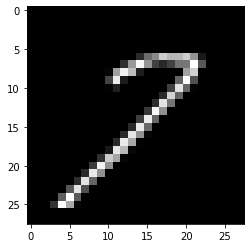

In [89]:
plt.imshow(X_test[0].reshape(28,28), cmap = 'gray')

In [92]:
model.score(X_test[0:100], y_test[0:100])

0.95

## Custom Implementation of KNN 

In [105]:
class CustomKNN:
    
    # constructor
    def __init__(self, n_neighbours = 5):
        self.n_neighbours = n_neighbours
    
    # training function
    def fit(self, X, y):
        self._X = X.astype(np.int64)
        self._y = y
        
   # predict the point
   # Given a single point, tell me to which class it belong.
    def predict_point(self, point):
        
        # storing the distance of given 'point' from each points in the training data set.
        list_dist = []
        
        # these points are from our training data.
        for x_point, y_point in zip(self._X, self._y):
            dist_point = ((point - x_point) ** 2).sum()
            list_dist.append([dist_point, y_point])
        
        # sorting the list according to distance.
        sorted_dist = sorted(list_dist)
            
        # selecting top k neighbours.   
        top_k = sorted_dist[:self.n_neighbours]
    
       # taking the counts.
       # we are finfing unique elements according to classes to which point belong not the unique 'distances'.
        items, counts = np.unique(np.array(top_k)[:, 1], return_counts = True)
        ans = items[np.argmax (counts)]
        return ans
            
   # predict function will give answer/output for each number in array.    
    def predict(self, X):
        results = []
        for point in X:
            results.append(self.predict_point(point))
        return np.array(results, dtype = int)
    
   # Score to measure model's accuracy between its predicted and actual output.  
    def score(self, X, y):
        return sum(self.predict(X) == y)/ len(y)

In [106]:
m2 = CustomKNN() # Initializing object of our custom class

In [107]:
m2.fit(X_train, y_train)

In [108]:
m2.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2])

In [109]:
Y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [110]:
m2.score(X_test[:100], y_test[:100])

0.95